# **Retrival Augmanted Generation Pipeline**

In [ ]:
!pip install -q langchain==0.0.219 openai==0.27.8

# !pip install -q transformers==4.29.2 sentencepiece==0.1.99 accelerate==0.19.0 bitsandbytes==0.39.0

!pip install -q python-dotenv==1.0.0

!pip install -q pandas==1.5.3
!pip install -q unstructured==0.7.12
!pip install -q wikipedia==1.4.0
!pip install -q pypdf==3.12.0
!pip install -q jq==1.4.1
!pip install -q nltk==3.8.1
!pip install -q tiktoken==0.4.0
!pip install -q transformers==4.29.2 sentencepiece==0.1.99
!pip install -q sentence-transformers==2.2.2
!pip install -q cohere==4.11.2
!pip install -q faiss-cpu==1.7.4
!pip install -q chromadb==0.3.26

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install langchain==0.0.1

  Attempting uninstall: langchain
    Found existing installation: langchain 0.0.219
    Uninstalling langchain-0.0.219:
      Successfully uninstalled langchain-0.0.219


In [ ]:
!pip install --upgrade langchain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 865.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.0.1
    Uninstalling langchain-0.0.1:
      Successfully uninstalled langchain-0.0.1


# **Documents**

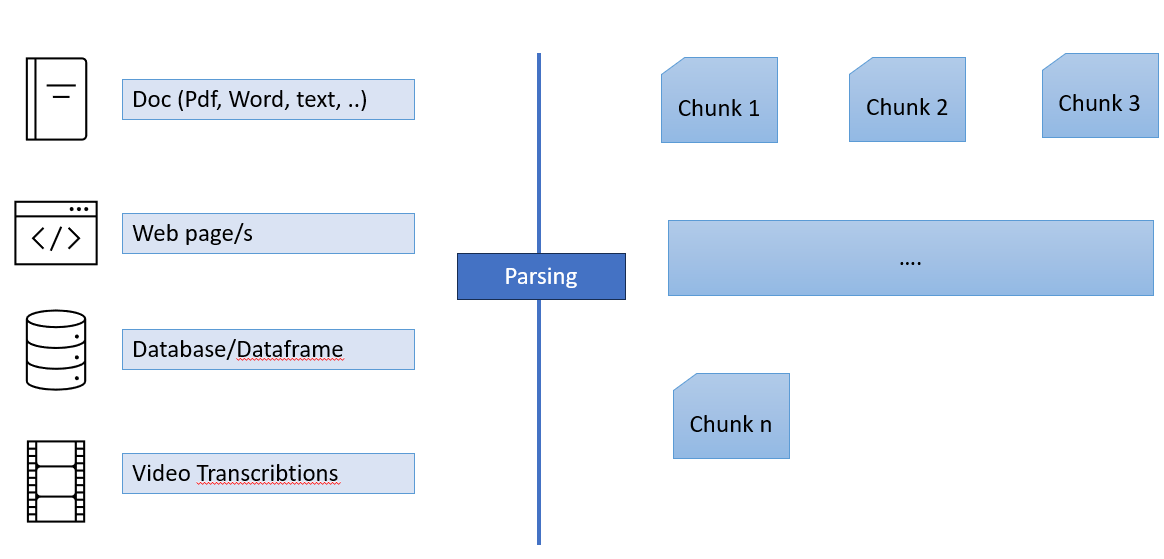

 *Loaders/Pandas*

In [ ]:
import pandas as pd


In [ ]:
from datasets import load_dataset

meeting_bank = load_dataset("lytang/MeetingBank-transcript")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
meeting_bank['train'][0]['source']

"Speaker 4: Thank you. And can we do the functions for content? Items I believe are 11, three, 14, 16 and 28, I believe.\nSpeaker 0: Item 11 is a communication from Council on Price recommendation to increase appropriation in the general fund group in the City Manager Department by $200 to provide a contribution to the Friends of the Long Beach Public Library. Item 12 is communication from Councilman Super Now. Recommendation to increase appropriation in the special advertising and promotion fund group and the city manager's department by $10,000 to provide support for the end of summer celebration. Item 13 is a communication from Councilman Austin. Recommendation to increase appropriation in the general fund group in the city manager department by $500 to provide a donation to the Jazz Angels . Item 14 is a communication from Councilman Austin. Recommendation to increase appropriation in the general fund group in the City Manager department by $300 to provide a donation to the Little 

In [ ]:
doc_texts = meeting_bank["train"]['source']

In [ ]:
len(doc_texts)


5169

In [ ]:
metadata = [
    {
        "meeting_id": rec["meeting_id"],
        "type": rec["type"],
        "reference": rec["reference"],
        "city": rec["city"]
    }
    for rec in meeting_bank["train"]
]

metadata += [
    {
        "meeting_id": "",
        "type": "",
        "reference": "",
        "city": ""
    }
    for i in range(5169)
 ]

In [ ]:
len(doc_texts)

5169

In [ ]:
raw_dataset = [
    {
        "meeting_id": rec["meeting_id"],
        "source": rec["source"],
        "type": rec["type"],
        "reference": rec["reference"],
        "city": rec["city"]
    }
    for rec in meeting_bank['train']
]

In [ ]:
meeting_bank_df = pd.DataFrame( raw_dataset )
meeting_bank_df = meeting_bank_df.sample(frac=1, random_state=101)

In [ ]:
meeting_bank_df

,meeting_id,source,type,reference,city
4156,DenverCityCouncil_04182016_16-0291,"Speaker 2: Councilwoman Gilmore, will you plea...",Bill,A bill for an ordinance concerning the licensi...,DenverCityCouncil
971,LongBeachCC_07102018_18-0579,Speaker 3: Three want to. Stay there. One more...,Agenda Item,Recommendation to request City Manager to work...,LongBeachCC
2856,SeattleCityCouncil_04262022_CB 120303,"Speaker 0: Thank you, Madam Clerk. The bill pa...",Ordinance (Ord),AN ORDINANCE relating to grant funds from the ...,SeattleCityCouncil
1656,LongBeachCC_07212015_15-0675,Speaker 0: Okay. Thank you. So I just a big me...,Resolution,Recommendation to receive supporting documenta...,LongBeachCC
3447,DenverCityCouncil_11302020_20-1124,Speaker 0: 13 Eyes Council Bill 20 Dash. 1123 ...,Bill,A bill for an ordinance changing the zoning cl...,DenverCityCouncil
...,...,...,...,...,...
4171,DenverCityCouncil_02012016_15-0912,Speaker 7: Thank you very much. Council Presid...,Bill,Amends various sections of the Denver Revised ...,DenverCityCouncil
599,LongBeachCC_05052020_20-0391,Speaker 0: Thank you. You please do. I am 25. ...,Ordinance,Recommendation to declare ordinance amending ...,LongBeachCC
1361,LongBeachCC_08232016_16-0796,"Speaker 0: Thank you. Next up is Kathy Lynn, p...",Agenda Item,Recommendation to review draft ordinance amend...,LongBeachCC
1547,LongBeachCC_12082015_15-1265,Speaker 10: Do you want to go back to item 14?...,Contract,Recommendation to adopt Specifications No. ITB...,LongBeachCC


In [ ]:
meeting_bank_df.shape

(5169, 5)

# **Split data to chunks**

In [ ]:
from langchain.text_splitter import NLTKTextSplitter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_splitter = NLTKTextSplitter(
    chunk_size=500
)

In [ ]:
nltk_chunks = text_splitter.create_documents(
    doc_texts, metadatas=metadata
)

In [ ]:
len(nltk_chunks)

287157

In [ ]:
print(nltk_chunks[5].page_content)

Speaker 4: We have a promotion and a second time as councilman served Councilman Ringa and customers and they have any comments.

Speaker 2: Now.

I had queued up to motion, but.

Speaker 4: Great that we have any public comment on this.

Speaker 5: If there are any members of the public that would like to speak on items 11, 12, 13, 14, 16 and 28 in person, please sign up at the podium in Zoom.

Please use the raise hand feature or dial star nine now.

Seen on the concludes public comment.


In [ ]:
print(nltk_chunks[5].metadata)

{'meeting_id': 'LongBeachCC_08092022_22-0922', 'type': 'Agenda Item', 'reference': 'Recommendation to increase appropriations in the General Fund Group in the City Manager Department by $200, offset by the Third Council District One-time District Priority Funds transferred from the Citywide Activities Department to provide a contribution to the Friends of the Long Beach Public Library for their Celebrate Our Librarians event; and\r\n\r\nDecrease appropriations in the General Fund Group in the Citywide Activities Department by $200 to offset a transfer to the City Manager Department.', 'city': 'LongBeachCC'}


**Tokens | Transformers Tokens**

In [ ]:
from transformers import AutoTokenizer
from langchain.text_splitter import CharacterTextSplitter

In [ ]:
model_id = "stabilityai/stablelm-tuned-alpha-3b"
tokenizer = AutoTokenizer.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
text_splitter = CharacterTextSplitter.from_huggingface_tokenizer(
    tokenizer,
    chunk_size=400,
    chunk_overlap=10
)

In [ ]:
tokens_chunks = text_splitter.create_documents(
    doc_texts, metadatas=metadata
)

In [ ]:
print( tokens_chunks[5].metadata )

{'meeting_id': 'LongBeachCC_08092022_22-0950', 'type': 'Resolution', 'reference': 'Recommendation to adopt resolution to ratify City Manager’s Proclamation of Local Emergency regarding the serious and imminent threat of monkeypox virus (MPV).  (Citywide)', 'city': 'LongBeachCC'}


# **Embeddings**

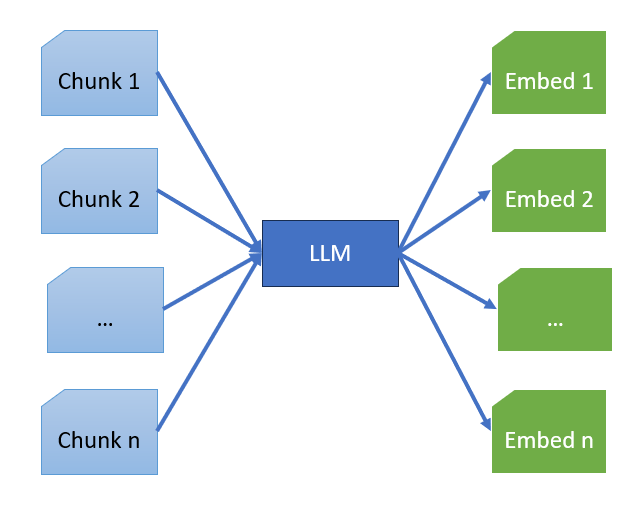

In [ ]:
from langchain.embeddings import SentenceTransformerEmbeddings

model_name = "sentence-transformers/all-MiniLM-L6-v2"

embedding_llm = SentenceTransformerEmbeddings(model_name=model_name)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
<ipython-input-32-c47dd98bbddd>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embedding_llm = SentenceTransformerEmbeddings(model_name=model_name)


In [ ]:
# source data
docs_text = [ chunk.page_content  for chunk in tokens_chunks ]
docs_embeddings = embedding_llm.embed_documents(docs_text)

# **Vector Database**

In [ ]:
from langchain.vectorstores import FAISS

vector_db = FAISS.from_documents(tokens_chunks, embedding_llm)

# **Question/Answer Chain**

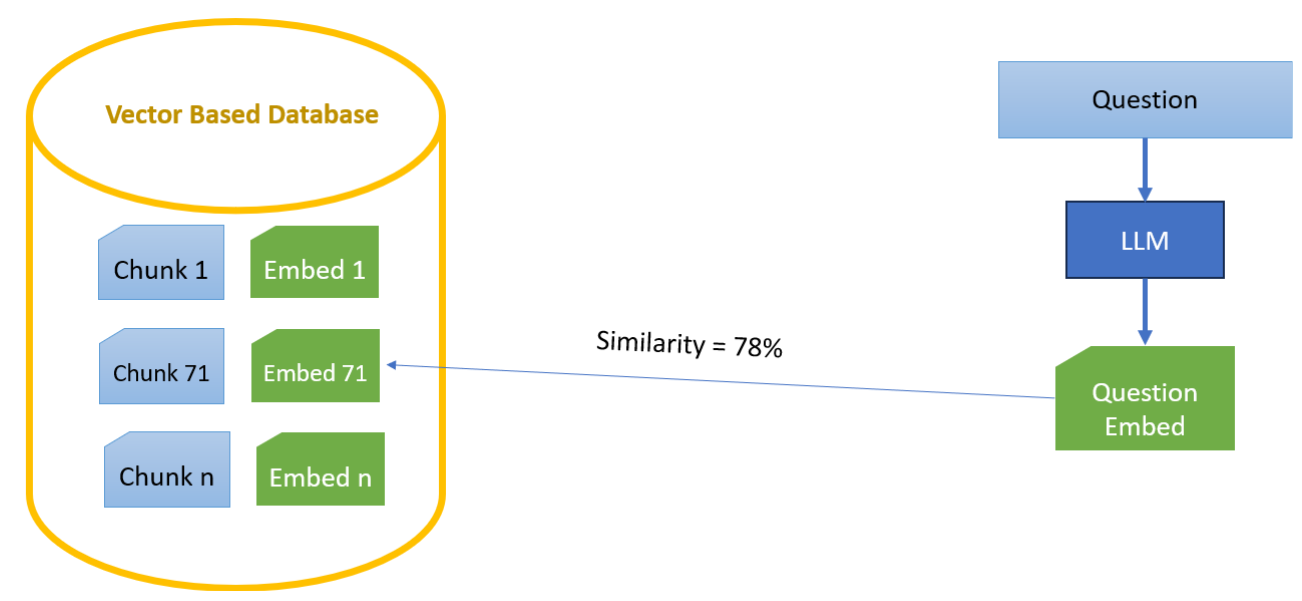

In [ ]:
question = "Give me report from Health and Human Services Recommendation to Adopt Resolution to ratify City Manager's?"

similar_docs = vector_db.similarity_search(question, k=2)

print( similar_docs )

[Document(metadata={'meeting_id': 'LongBeachCC_05122015_15-0414', 'type': 'Ordinance', 'reference': 'Recommendation to declare ordinance making findings and determinations regarding contracting for work usually performed by City employees and authorizing City Manager to negotiate and enter a contract with Managed Health Network for employee assistance services, read and adopted as read.  (Citywide)', 'city': 'LongBeachCC'}, page_content="Speaker 11: Item 18, which I believe will require two motions.\nSpeaker 2: Report from Human Resources and Financial Management. Recommendation to award a contract to a managed health network for provision of employee assistance services for a total amount not to exceed 101,161 per year for a period of three years and declare Proposition L ordinance read for the first time and laid over to the next regular meeting of the City Council for Final Reading Citywide.\nSpeaker 11: Sir. Staff Report. Mr. WEST.\nSpeaker 5: Yes. Vice Mayor, this is our director,

Example 1 :

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

from langchain.llms import HuggingFacePipeline

model_id = "h2oai/h2ogpt-gm-oasst1-en-2048-open-llama-3b"

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=False)

base_model = AutoModelForCausalLM.from_pretrained(model_id,
                                            torch_dtype=torch.float16,
                                            device_map='auto',)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:446: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializ

In [ ]:
pipe = pipeline("text-generation",
                model=base_model,
                tokenizer=tokenizer,
                max_length=1083,
                temperature=0.6,
                top_p=0.95,
                repetition_penalty=1.2)

llm = HuggingFacePipeline(pipeline=pipe)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
<ipython-input-36-47f181d7fbc8>:9: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  llm = HuggingFacePipeline(pipeline=pipe)


***Question/Answer responce template***

In [ ]:
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder

# System Prompt (Static Section)
system_prompt = "\n".join([
    "You are an assistant to generate a response for the user.",
    "You will be provided by a set of documents associated with the user's query.",
    "You have to generate a response based on the documents provided.",
    "Ignore the documents that are not relevant to the user's query.",
    "You can apologize to the user if you are not able to generate a response.",
    "You have to generate the response in the same language as the user's query.",
    "Be polite and respectful to the user.",
    "Be precise and concise in your response. Avoid unnecessary information."
])

# Document template
document_template = """
## Document No: {doc_num}
### Content: {chunk_text}
"""

# Footer prompt
footer_template = """
Based only on the above documents, please generate an answer for the user.
## Answer:
"""

# Define the ChatPromptTemplate
chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", document_template),  # For documents that will be passed
    MessagesPlaceholder(variable_name="history"),  # This allows for multi-turn conversations
    ("system", footer_template)
])

# Example usage:
doc_num = 1
chunk_text = "This is an example document chunk."

# Format the messages for the chat
formatted_messages = chat_prompt.format_messages(
    doc_num=doc_num,
    chunk_text=chunk_text
)

# Print the formatted chat prompt
for message in formatted_messages:
    print(message.content)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 40>:40                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/langchain_core/prompts/chat.py:1221 in format_messages   │
│                                                                                                  │
│   1218 │   │   │   elif isinstance(                                                              │
│   1219 │   │   │   │   message_template, (BaseMessagePromptTemplate, BaseChatPromptTemplate)     │
│   1220 │   │   │   ):                                                                            │
│ ❱ 1221 │   │   │   │   message = message_template.format_messages(**kwargs)                      │
│   1222 │   │   │   │   result.extend(message)                                                    │
│   1223 │   │   │   else:                                                                         │
│   1224 │   │   │   │   raise ValueError(f"Unexpected input: {message_template}")                 │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/langchain_core/prompts/chat.py:241 in format_messages    │
│                                                                                                  │
│    238 │   │   value = (                                                                         │
│    239 │   │   │   kwargs.get(self.variable_name, [])                                            │
│    240 │   │   │   if self.optional                                                              │
│ ❱  241 │   │   │   else kwargs[self.variable_name]                                               │
│    242 │   │   )                                                                                 │
│    243 │   │   if not isinstance(value, list):                                                   │
│    244 │   │   │   raise ValueError(                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'history'

# **Retrieve Relevant Chunks and Generate Summary:**

In [ ]:
from langchain.prompts import PromptTemplate, ChatPromptTemplate

In [ ]:
from langchain.prompts import PromptTemplate

# System prompt
system_prompt = "\n".join([
    "You are an assistant tasked with generating a meeting transcription summary for the user.",
    "You will be provided with a set of documents associated with the user's query.",
    "You have to provide a concise summary of the following meeting transcription.",
    "Focus on key discussion points, decisions made, and any action items identified.",
    "Ensure that the summary is clear and covers all major topics discussed.",
    "Ignore the documents that are not relevant to the user's query.",
    "If you are unable to generate a summary, you may apologize to the user.",
    "Generate the summary in the same language as the user's query.",
    "Be polite and respectful to the user.",
    "Be precise and concise in your response. Avoid unnecessary information.",
    "",
    "### Content: \n"
])

# Document prompt
document_template = """
{meeting_transcript}
"""

# Footer prompt
footer_prompt = """
Based only on the above document, please generate a summary for the user.
## Answer:
"""

# Combine system prompt, document template, and footer prompt
full_prompt_template = PromptTemplate(
    template=system_prompt + document_template + footer_prompt,
    input_variables=["meeting_transcript"]
)

# Example of how to format the prompt for use:
#meeting_transcript = meeting_bank['train'][0]['source']

# Formatting document
#full_prompt = full_prompt_template.format(meeting_transcript=meeting_transcript)

#print(full_prompt)


In [ ]:
def get_chunks_by_meeting_id(meeting_id, chunks):
    return [chunk for chunk in chunks if chunk.metadata["meeting_id"] == meeting_id]

# Example usage
meeting_id = "LongBeachCC_05122015_15-0414"  # Replace with actual meeting ID
relevant_chunks = get_chunks_by_meeting_id(meeting_id, tokens_chunks)

# Combine text of relevant chunks
meeting_transcript = "\n".join(chunk.page_content for chunk in relevant_chunks)

# Format the prompt
full_prompt = full_prompt_template.format(meeting_transcript=meeting_transcript)

print(full_prompt)

# Generate summary using the formatted prompt
# Assuming you have a model to generate summaries from the prompt


You are an assistant tasked with generating a meeting transcription summary for the user.
You will be provided with a set of documents associated with the user's query.
You have to provide a concise summary of the following meeting transcription.
Focus on key discussion points, decisions made, and any action items identified.
Ensure that the summary is clear and covers all major topics discussed.
Ignore the documents that are not relevant to the user's query.
If you are unable to generate a summary, you may apologize to the user.
Generate the summary in the same language as the user's query.
Be polite and respectful to the user.
Be precise and concise in your response. Avoid unnecessary information.

### Content: 

Speaker 11: Item 18, which I believe will require two motions.
Speaker 2: Report from Human Resources and Financial Management. Recommendation to award a contract to a managed health network for provision of employee assistance services for a total amount not to exceed 101,1

In [ ]:
print(llm(full_prompt))

<ipython-input-49-311432e00098>:1: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  print(llm(full_prompt))
Token indices sequence length is longer than the specified maximum sequence length for this model (2399 > 2048). Running this sequence through the model will result in indexing errors
Input length of input_ids is 2399, but `max_length` is set to 1083. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
